In [2]:
#Libería necesaria

import pandas as pa #Análisis y lectura de datos
import numpy as nu #Cálculo nrico y análisis de datos
import seaborn as se #Creación gráfica estadístico
import matplotlib.pyplot as plo #Creación de gráficos 2D

#Librería para modelo de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#Lectura de datos y se cargan en variable
Dataset = pa.read_csv('C:/Users/USER/3D Objects/heart_cleveland_upload.csv')

In [ ]:
#1. Realizar un análisis exploratorio

In [7]:
#Mostrar datos

Dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [8]:
#Describir característica de datos
Dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Valores de paciendes con su promedio de edad')

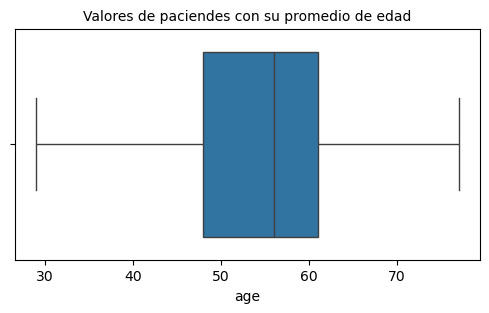

In [26]:
plo.figure(figsize=(6, 3))
se.boxplot(x=Dataset['age'])
plo.title('Valores de paciendes con su promedio de edad', fontsize=10)

Text(0.5, 1.0, 'Presión arterial')

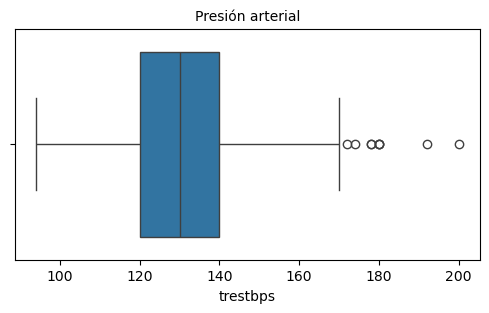

In [22]:
plo.figure(figsize=(6, 3))
se.boxplot(x=Dataset['trestbps'])
plo.title('Presión arterial', fontsize=10)

Text(0.5, 1.0, 'Colesterol')

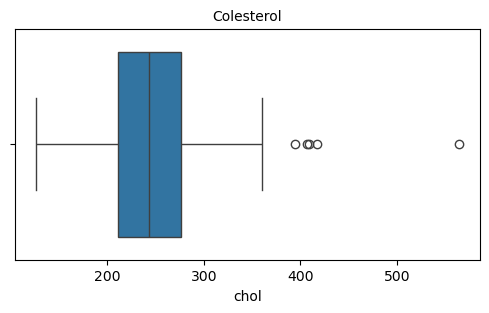

In [23]:
plo.figure(figsize=(6, 3))
se.boxplot(x=Dataset['chol'])
plo.title('Colesterol', fontsize=10)

#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  

In [25]:
#En este data no es necesario ya que las columnas tienen los datos completos.

Text(0.5, 1.0, 'Colesterol')

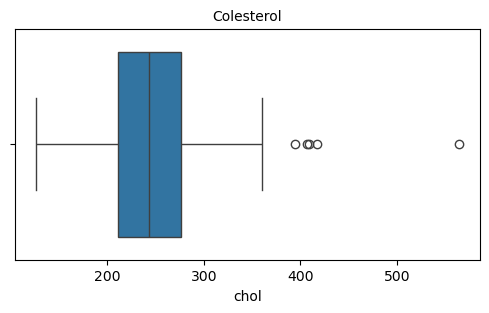

In [23]:
#Sin embargo, se hace la identificación de valores atípicos

plo.figure(figsize=(6, 3))
se.boxplot(x=Dataset['chol'])
plo.title('Valores atípicos del Colesterol', fontsize=10)

In [35]:
#Conteo de datos atípicos

nivel_min =250
nivel_max =500
Total_atip =((Dataset['chol']<nivel_min)|(Dataset['chol']>nivel_max)).sum()
print("Total de valores atípicos son: {}".format(Total_atip))

Total de valores atípicos son: 168


In [38]:
#Filtrar los datos atípicos
Dataset = Dataset[(Dataset['chol']<nivel_max)&(Dataset['chol']>nivel_min)]

In [41]:
#Se valida si se cambiaron los atípicos
Total_atip=((Dataset['chol']<nivel_min)|(Dataset['chol']>nivel_max)).sum()
print("El total de los atípicos es: {}".format(Total_atip))

El total de los atípicos es: 0


In [42]:
#Revisión del tipo de datos y datos faltantes
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 3 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        126 non-null    int64  
 1   sex        126 non-null    int64  
 2   cp         126 non-null    int64  
 3   trestbps   126 non-null    int64  
 4   chol       126 non-null    int64  
 5   fbs        126 non-null    int64  
 6   restecg    126 non-null    int64  
 7   thalach    126 non-null    int64  
 8   exang      126 non-null    int64  
 9   oldpeak    126 non-null    float64
 10  slope      126 non-null    int64  
 11  ca         126 non-null    int64  
 12  thal       126 non-null    int64  
 13  condition  126 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 14.8 KB


In [44]:
#3. Seleccionar las características más relevantes para entrenar al modelo utiliznado seleccion de características
#0=No tiene ataque cardiaco; 1=sí tiene
Dataset['condition'].value_counts()

condition
1    69
0    57
Name: count, dtype: int64

In [131]:
#4Dividir el dataset en Train y Test para evaluar correctamente el modelo. 
#Porcentaje de train 75% y para test 25%
#Se crean variabkes x & y

X = Dataset.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = Dataset['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [ ]:
print(X_train)

In [ ]:
print(Y_test)

In [87]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros.
modelo_regresion = LogisticRegression(solver = "liblinear") #Librería para problemas lineales
modelo_regresion.fit (X_train, Y_train)

#Crear modelo de predicción
Prediccion = modelo_regresion.predict(X_test) #Predice los valores a partir de un conjunto de éstos.

In [113]:
x_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
195,61,0,3,130,330,0,2,169,0,0.0,0,0,0
280,44,1,3,112,290,0,2,153,0,0.0,0,1,0
41,55,1,1,130,262,0,0,155,0,0.0,0,0,0
244,54,1,3,124,266,0,2,109,1,2.2,1,1,2
106,56,1,2,130,256,1,2,142,1,0.6,1,1,1
83,65,0,2,140,417,1,2,157,0,0.8,0,1,0
204,60,1,3,130,253,0,0,144,1,1.4,0,1,2
269,48,1,3,130,256,1,2,150,1,0.0,0,2,2
143,43,1,2,130,315,0,0,162,0,1.9,0,1,0
23,74,0,1,120,269,0,2,121,1,0.2,0,1,0


In [ ]:
print (Prediccion)

In [ ]:
#6 Desempeño
print(classification_report(Y_test,Prediccion)

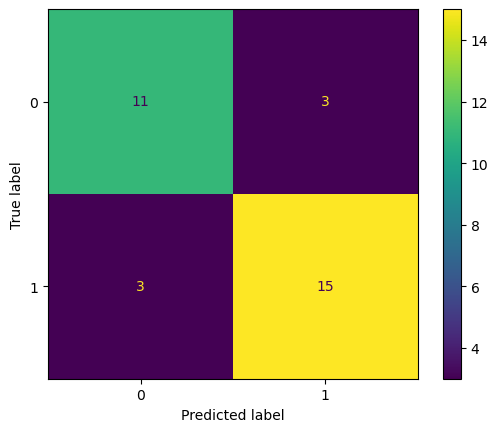

In [135]:
#7 Matriz de confusión modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

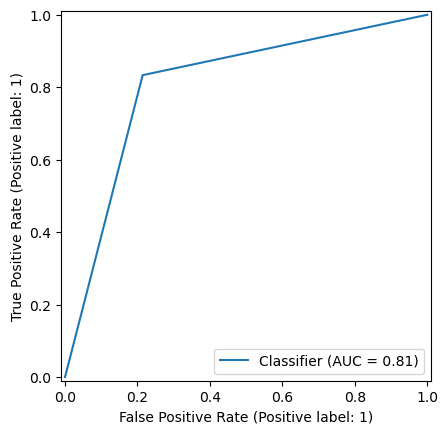

In [139]:
# curva de precisión 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plo.show()

In [ ]:
#Del desempeño del modelo puedo describir:

#Para la clase 'condition', la precisión es del 93%, como enfermos cardíacos.
#El Recall, es del 81%, dando a entender que el modelo lo identificó de todos los enfermos cardíacos.
#El F1 Score es de 0.87, lo que indica un equilibrio entre precisión y recall.
#De la Matriz de Confusión se puede apreciar:

#Verdaderos negativos: Representan un total de 36 casos.
#Verdaderos positivos: 26 casos identificados.
#Falsos positivos: Un total de 2 casos erróneos.
#Falsos negativos: Un total de 6 casos mal clasificados
#De la Curva de Precisión se puede apreciar:
#El AUC es de 0.88, lo que indica que el 88% de las predicciones del clasificador son correctas
